,Станция,Номер линии,Дата,2024-04-03 00:00:00,2024-04-02 00:00:00,2024-04-01 00:00:00,2024-03-31 00:00:00,2024-03-30 00:00:00,2024-03-29 00:00:00,2024-03-28 00:00:00,...,2024-01-10 00:00:00,2024-01-09 00:00:00,2024-01-08 00:00:00,2024-01-07 00:00:00,2024-01-06 00:00:00,2024-01-05 00:00:00,2024-01-04 00:00:00,2024-01-03 00:00:00,2024-01-02 00:00:00,2024-01-01 00:00:00
0,Б.Рокоссовского,8,СОКОЛЬНИЧЕСКАЯ,16671,15113,2905,13998,12742,1217,17624,...,7280,4669,3812,5816,15740,13714,2561,11209,2722,4835
1,Черкизовская,8,СОКОЛЬНИЧЕСКАЯ,6248,5441,7991,14864,10015,9721,6623,...,13486,5061,3663,11353,6924,6496,15991,7029,3999,15638
2,Преображенск. пл,8,СОКОЛЬНИЧЕСКАЯ,14094,1132,6556,7265,4001,10961,6852,...,8176,9745,13281,15090,13309,8365,2811,5004,17068,17117
3,Сокольники СЛ,8,СОКОЛЬНИЧЕСКАЯ,18651,10083,6488,6409,9446,12051,15041,...,3637,14001,12049,15972,15545,18759,5573,15017,14176,5465
4,Красносельская,8,СОКОЛЬНИЧЕСКАЯ,7391,19339,15424,10725,5965,14682,18134,...,14194,7615,9321,16152,4581,7746,8936,11373,19561,1727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Аэропорт Внуково,1691,СОЛНЦЕВСКАЯ ЛИН.,15787,10257,13493,8656,5761,18352,6449,...,9654,17815,12401,15277,13153,19801,17569,13950,7545,14178
318,Яхромская,18,ЛЮБЛИНСКАЯ,9813,19663,12491,9180,3563,19023,5655,...,12471,17980,2322,6341,16395,14759,14798,17189,3864,12536
319,Лианозово,18,ЛЮБЛИНСКАЯ,18978,8499,2959,12203,9070,3349,5543,...,17639,14071,17237,16304,8357,5616,16496,8603,16046,5489
320,Физтех,18,ЛЮБЛИНСКАЯ,1476,2893,9897,9793,9822,4534,4115,...,16336,17256,14147,2938,15037,3834,5997,5933,4969,5404


,Станция,Номер линии,Дата,Количество пассажиров
0,Б.Рокоссовского,8,2024-04-03,16671
1,Черкизовская,8,2024-04-03,6248
2,Преображенск. пл,8,2024-04-03,14094
3,Сокольники СЛ,8,2024-04-03,18651
4,Красносельская,8,2024-04-03,7391


29955   2024-01-01
29633   2024-01-02
29311   2024-01-03
28989   2024-01-04
28667   2024-01-05
           ...    
1297    2024-03-30
975     2024-03-31
653     2024-04-01
331     2024-04-02
9       2024-04-03
Name: Дата, Length: 94, dtype: datetime64[ns]


<ipython-input-110-0e005e6b1091>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data['Дата'] = pd.to_datetime(grouped_data['Дата'])


            Количество пассажиров
Дата                             
2024-01-01                   1224
2024-01-02                   2078
2024-01-03                  15905
2024-01-04                  13708
2024-01-05                  13439
...                           ...
2024-03-30                  17311
2024-03-31                  12608
2024-04-01                  19685
2024-04-02                   7671
2024-04-03                  19856

[94 rows x 1 columns]


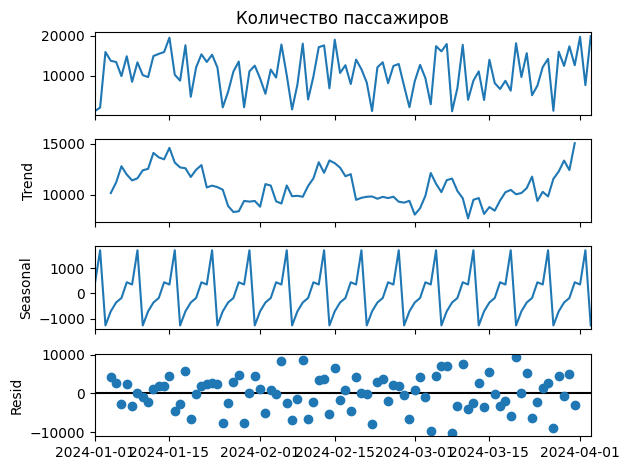

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



def your_station(station_name):
  file_path = "/content/пп_станции.xlsx"
  data = pd.read_excel(file_path)
  cleaned_data = data.drop(columns=['Дата'])
  long_format_data = cleaned_data.melt(id_vars=['Станция', 'Номер линии'], var_name='Дата', value_name='Количество пассажиров')
  long_format_data.head()
  sorted_data = long_format_data.sort_values(by=['Станция', 'Дата'])
  grouped_data = sorted_data[sorted_data["Станция"] == station_name]
  if not isinstance(grouped_data.index, pd.DatetimeIndex):
      print(grouped_data['Дата'] )
      grouped_data['Дата'] = pd.to_datetime(grouped_data['Дата'])
      grouped_data.set_index('Дата', inplace=True)
  group = grouped_data.asfreq('D')
    # Выполняем декомпозицию временного ряда
  results = seasonal_decompose(group['Количество пассажиров'].dropna(), model='additive')
  results.plot()

  group = group.drop(columns=['Станция', 'Номер линии'])
  print(group)


"сюда подаём нужную нам станцию:"
your_station("Охотный ряд")




In [111]:
!pip install sktime
!pip install pmdarima

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Количество пассажиров'>)

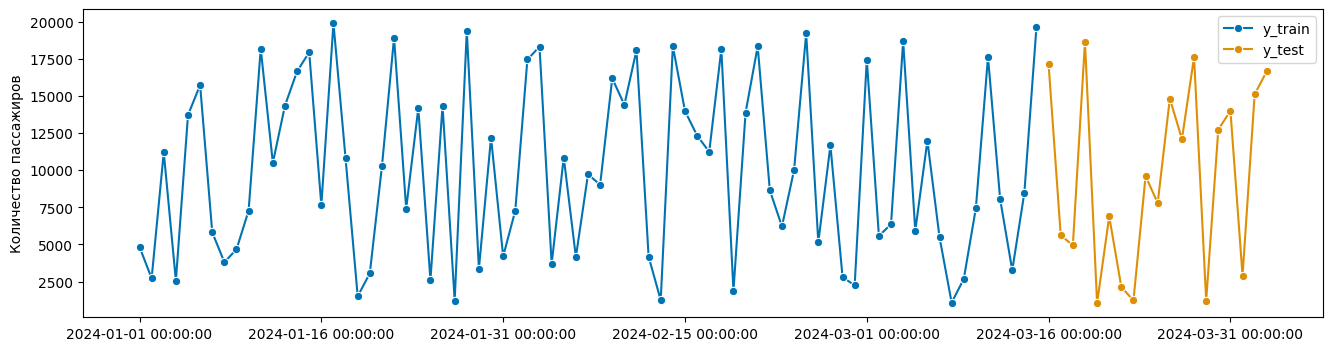

In [242]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series


group['Количество пассажиров'] = group['Количество пассажиров'].astype(float)


y_train, y_test = temporal_train_test_split(group['Количество пассажиров'], test_size=19)

plot_series(y_train, y_test, labels=["y_train", "y_test"])


In [245]:
import pmdarima as pm
from pmdarima import model_selection
import pmdarima as pm

arima_model = pm.auto_arima(
    y_train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=True,
    m=7,
    d=None,
    D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1401.723, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1425.533, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1420.304, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1423.763, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1418.827, Time=0.06 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1406.439, Time=0.63 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=1409.404, Time=0.10 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1413.653, Time=0.26 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept   : AIC=1411.665, Time=0.45 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1410.887, Time=0.12 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=1408.006, Time=0.35 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=1412.1

In [115]:
print(arima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   75
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -686.953
Date:                           Sat, 20 Apr 2024   AIC                           1381.905
Time:                                   20:21:34   BIC                           1390.783
Sample:                               01-01-2024   HQIC                          1385.423
                                    - 03-15-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    241.0372    253.954      0.949      0.343    -256.704     738.779
ma.L1          0.1733      0.118      1.467

In [238]:
import numpy as np


def predict_to_data(number):

  y_pred, pred_ci = arima_model.predict(
      n_periods=19 + number,
      return_conf_int=True,
      alpha=0.05
  )
  return y_pred[:len(y_test)], pred_ci[:len(y_test)]



predict_to_data(0)


def mape(predicted, true):
    return sqrt(mean_squared_error(predicted, true))

# Среднеквадратичная ошибка
mape(y_pred[:len(y_test)], y_test)

4987.079258265715

In [237]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt


df_forecast = pd.DataFrame({
    'y_pred': y_pred,
    'ci_lower': pred_ci[:, 0],
    'ci_upper': pred_ci[:, 1]
})


2024-03-16     6978.107366
2024-03-17    10444.204254
2024-03-18    10767.686989
2024-03-19     9533.375360
2024-03-20    10785.345398
2024-03-21     9479.635681
2024-03-22    10717.573508
2024-03-23     8193.983094
2024-03-24    10685.241479
2024-03-25    11008.724214
2024-03-26     9774.412584
2024-03-27    11026.382622
2024-03-28     9720.672905
2024-03-29    10958.610732
2024-03-30     8435.020319
2024-03-31    10926.278704
2024-04-01    11249.761438
2024-04-02    10015.449809
2024-04-03    11267.419847
2024-04-04     9961.710130
2024-04-05    11199.647957
2024-04-06     8676.057543
2024-04-07    11167.315928
2024-04-08    11490.798663
2024-04-09    10256.487034
2024-04-10    11508.457071
2024-04-11    10202.747355
2024-04-12    11440.685181
2024-04-13     8917.094768
2024-04-14    11408.353153
2024-04-15    11731.835887
2024-04-16    10497.524258
2024-04-17    11749.494296
2024-04-18    10443.784579
2024-04-19    11681.722406
2024-04-20     9158.131992
2024-04-21    11649.390377
2

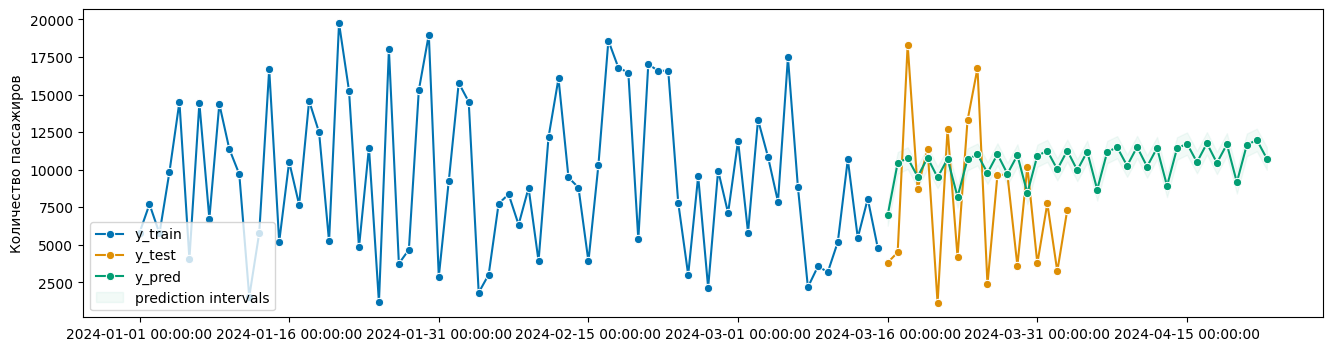

In [239]:
fig, ax = plot_series(y_train, y_test, df_forecast.y_pred, labels=["y_train", "y_test", "y_pred"]);
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    df_forecast["ci_lower"],
    df_forecast["ci_upper"],
    alpha=0.05,
    color=ax.get_lines()[-1].get_c(),
    label=f"prediction intervals",
)
ax.legend(loc='lower left');

# Это спрогнозированные данные:
print(df_forecast.y_pred)



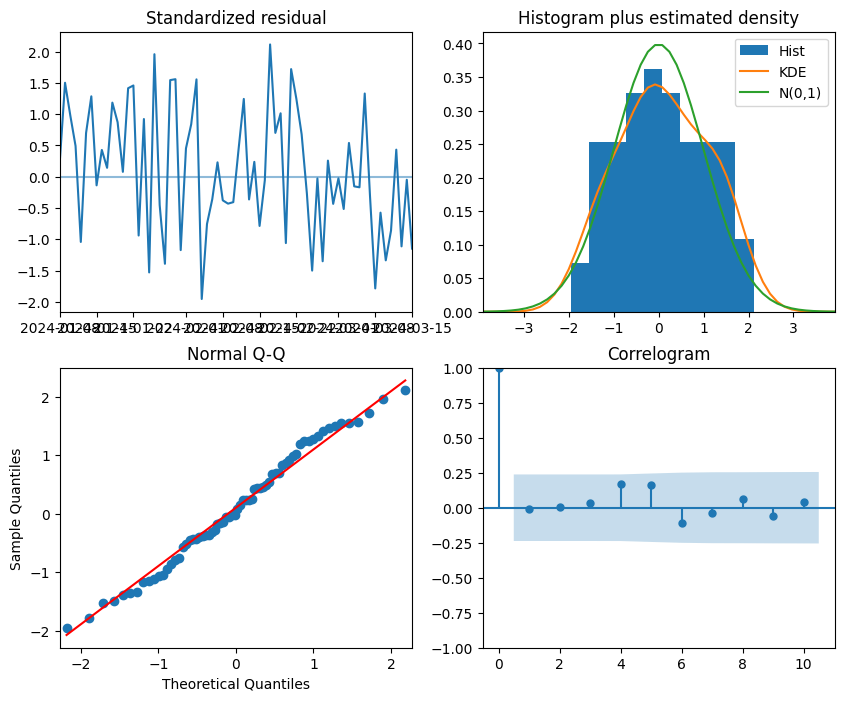

In [241]:
# Это можно убрать:
# arima_model.plot_diagnostics(figsize=(10, 8));
